In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import math
import librosa

In [51]:
#Using the 30 second dataset as it has less records and less is better for KNNs as it is a "lazy learning" algorithm
df_30_sec = pd.read_csv('../Data/features_30_sec.csv')
df_30_sec.head()
#Creating the labelled data X and Y
x_records = df_30_sec.drop(columns = ['filename','length','label'])
print(len(x_records.columns))
y_records = df_30_sec['label']

57


In [52]:
#Splitting our data into testing and training data using a 20% split
x_train,x_test,y_train,y_test = train_test_split(x_records,y_records,test_size=0.2)

In [53]:
#Feature scaling
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.fit_transform(x_test)

[Text(0.39674852715163933, 0.9736842105263158, 'x[15] <= -0.784\ngini = 0.899\nsamples = 800\nvalue = [80, 72, 82, 81, 73, 84, 71, 90, 86, 81]'),
 Text(0.06030444964871194, 0.9210526315789473, 'x[6] <= -0.655\ngini = 0.609\nsamples = 119\nvalue = [5, 65, 7, 1, 1, 35, 0, 1, 0, 4]'),
 Text(0.026932084309133488, 0.868421052631579, 'x[27] <= -0.392\ngini = 0.418\nsamples = 87\nvalue = [5, 65, 3, 1, 0, 12, 0, 0, 0, 1]'),
 Text(0.00936768149882904, 0.8157894736842105, 'x[37] <= -1.568\ngini = 0.07\nsamples = 56\nvalue = [0, 54, 0, 1, 0, 1, 0, 0, 0, 0]'),
 Text(0.00468384074941452, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.01405152224824356, 0.7631578947368421, 'x[12] <= -1.478\ngini = 0.036\nsamples = 55\nvalue = [0, 54, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(0.00936768149882904, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(0.01873536299765808, 0.7105263157894737, 'gini = 0.0\nsamples = 54\nvalue

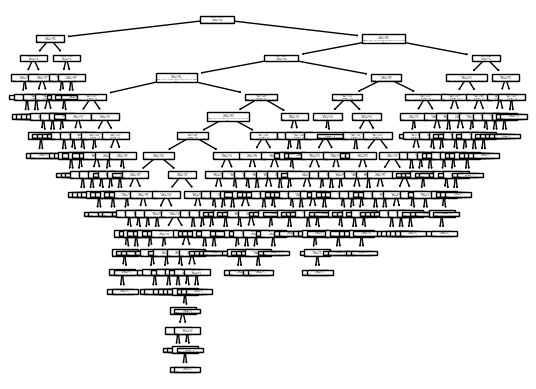

In [54]:
#Training the Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
tree.plot_tree(DTC)


In [55]:
y_predictions = DTC.predict(x_test)

print("accuracy :",accuracy_score(y_predictions,y_test),"%")

accuracy : 0.5 %


Barebones Confusion matrix is:
 [[ 7  0  3  2  1  0  1  0  0  6]
 [ 0 21  0  0  0  6  0  0  0  1]
 [ 0  0 10  3  0  1  0  1  1  2]
 [ 1  0  1  8  2  0  1  2  2  2]
 [ 1  0  0  2  8  0  1  4 10  1]
 [ 1  2  0  1  1 10  0  0  0  1]
 [ 4  0  1  1  3  2 15  0  0  3]
 [ 0  0  1  1  1  0  0  7  0  0]
 [ 0  0  1  0  2  1  0  3  5  2]
 [ 5  1  0  1  1  0  0  1  1  9]]


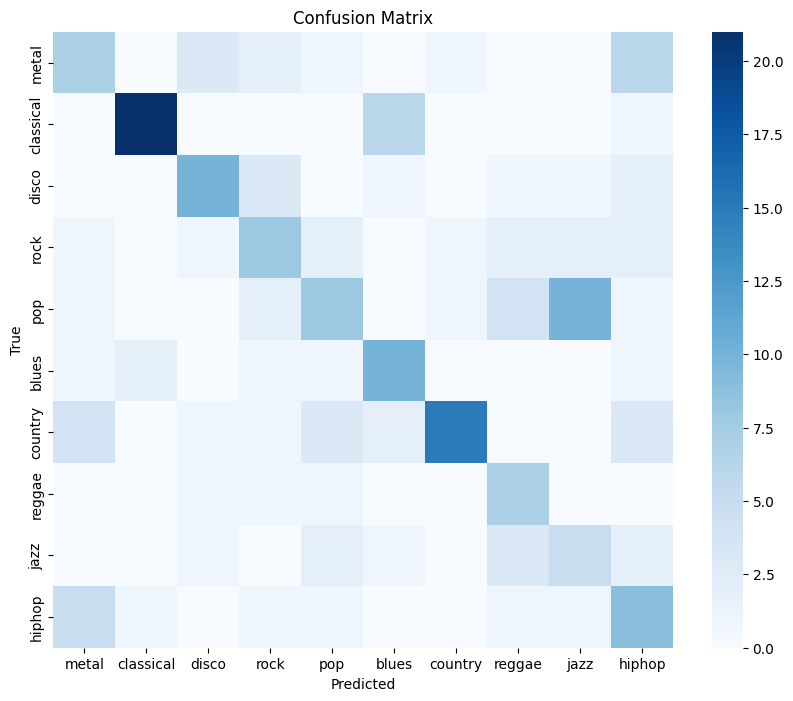

In [56]:
#Evaluation metrics
#Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_predictions)
print("Barebones Confusion matrix is:\n",conf_matrix)
class_names = list(set(y_test))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='g',cbar = True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
#Classification Report is:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

       blues       0.37      0.35      0.36        20
   classical       0.88      0.75      0.81        28
     country       0.59      0.56      0.57        18
       disco       0.42      0.42      0.42        19
      hiphop       0.42      0.30      0.35        27
        jazz       0.50      0.62      0.56        16
       metal       0.83      0.52      0.64        29
         pop       0.39      0.70      0.50        10
      reggae       0.26      0.36      0.30        14
        rock       0.33      0.47      0.39        19

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.54      0.50      0.51       200

